### Map of PV systems

In [1]:
# Map of PV systems here 
# https://github.com/openclimatefix/power_perceiver/blob/main/notebooks/2022-02-28_predict_pv_using_pvlib/predict_pv_using_pvlib.ipynb

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
metadata_df = pd.read_csv('../data/uk_pv/metadata.csv')
metadata_df.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


In [3]:
pv_power = xr.open_dataset("../data/uk_pv/pv.netcdf", engine="h5netcdf")

In [4]:
ss_ids_with_readings = np.array(pv_power.data_vars)
ss_ids_with_readings = ss_ids_with_readings.astype(int)


print('How many SS have readings? ', len(ss_ids_with_readings))
print('How many PVs do we have metadata for? ', metadata_df.shape[0])

How many SS have readings?  1311
How many PVs do we have metadata for?  24662


In [5]:
metadata_df_with_readings = metadata_df[metadata_df['ss_id'].isin(ss_ids_with_readings)]
metadata_df_with_readings.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
198,2603,51.70,-4.71,W01000610,210.0,32.0,3.96,2012-04-02
202,2607,52.44,-0.12,E01018211,200.0,35.0,2.94,2011-08-25
220,2625,50.38,-4.22,E01033294,190.0,38.0,2.35,2011-08-23
221,2626,54.99,-3.18,S00097762,270.0,22.0,3.60,2011-08-18
223,2628,50.99,-1.37,E01022706,225.0,34.0,1.38,2011-09-20


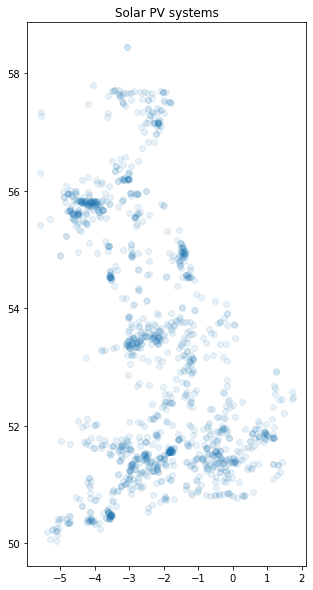

In [6]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df_with_readings.longitude_rounded, metadata_df_with_readings.latitude_rounded, alpha=0.1)
plt.title("Solar PV systems");

In [7]:
df = metadata_df_with_readings
gdf = gpd.GeoDataFrame(df, crs={'init':'epsg:4326'}, geometry=gpd.points_from_xy(df.longitude_rounded, df.latitude_rounded))
gdf

/home/ben/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,geometry
198,2603,51.70,-4.71,W01000610,210.0,32.0,3.96,2012-04-02,POINT (-4.71000 51.70000)
202,2607,52.44,-0.12,E01018211,200.0,35.0,2.94,2011-08-25,POINT (-0.12000 52.44000)
220,2625,50.38,-4.22,E01033294,190.0,38.0,2.35,2011-08-23,POINT (-4.22000 50.38000)
221,2626,54.99,-3.18,S00097762,270.0,22.0,3.60,2011-08-18,POINT (-3.18000 54.99000)
223,2628,50.99,-1.37,E01022706,225.0,34.0,1.38,2011-09-20,POINT (-1.37000 50.99000)
...,...,...,...,...,...,...,...,...,...
24657,27063,51.41,-2.49,E01014398,185.0,35.0,4.00,2018-04-18,POINT (-2.49000 51.41000)
24658,27064,51.47,-0.59,E01016588,180.0,45.0,2.00,2018-04-18,POINT (-0.59000 51.47000)
24659,27065,51.36,-2.93,E01014817,125.0,37.0,4.00,2018-04-18,POINT (-2.93000 51.36000)
24660,27066,51.44,-2.85,E01014759,165.0,35.0,4.00,2018-04-18,POINT (-2.85000 51.44000)


In [8]:
# https://geoportal.statistics.gov.uk/datasets/ons::countries-december-2021-gb-bfc/about

uk_shapefile = gpd.read_file('CTRY_DEC_2021_GB_BFC.shp').to_crs("epsg:4326")

In [9]:
uk_shapefile.to_crs("epsg:4326")

,OBJECTID,CTRY21CD,CTRY21NM,CTRY21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,1,E92000001,England,Lloegr,394883,370883,-2.07811,53.235001,{BC2053F2-BEE6-4B30-B53B-6332AF6045B3},1.358948e+07,1.304623e+11,"MULTIPOLYGON (((-6.39946 49.86527, -6.39935 49..."
1,2,S92000003,Scotland,Yr Alban,277744,700060,-3.97094,56.177399,{3D6CBEDE-3847-48EE-825F-58A039B2C387},1.890234e+07,7.880122e+10,"MULTIPOLYGON (((-4.08528 54.76859, -4.08527 54..."
2,3,W92000004,Wales,Cymru,263405,242881,-3.99417,52.067402,{7EE0BAB0-9DD8-445E-9295-D2A0739B2AFF},3.273760e+06,2.078260e+10,"MULTIPOLYGON (((-3.12097 51.38017, -3.12097 51..."


In [10]:
uk_shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

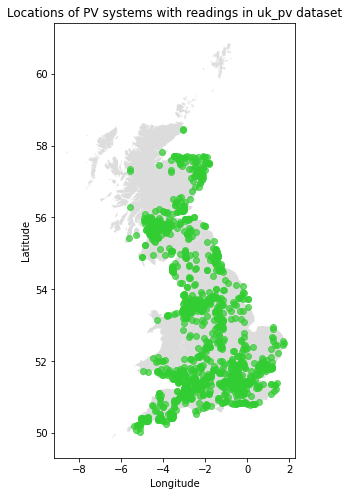

In [12]:
fig, ax = plt.subplots(figsize=(5,8))

uk_shapefile.plot(ax=ax, color='gainsboro')
gdf.plot(ax=ax, color='limegreen', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of PV systems with readings in uk_pv dataset');

fig.savefig('uk_pv_locations.jpg')

In [16]:
dir(gdf)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce

In [20]:
gdf.project()

TypeError: GeoPandasBase.project() missing 1 required positional argument: 'other'

In [ ]:
# https://github.com/openclimatefix/power_perceiver/blob/main/notebooks/2022-02-28_predict_pv_using_pvlib/predict_pv_using_pvlib.ipynb
